# **BÀI TẬP THỰC HÀNH PANDAS VÀ MATPLOTLIB**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


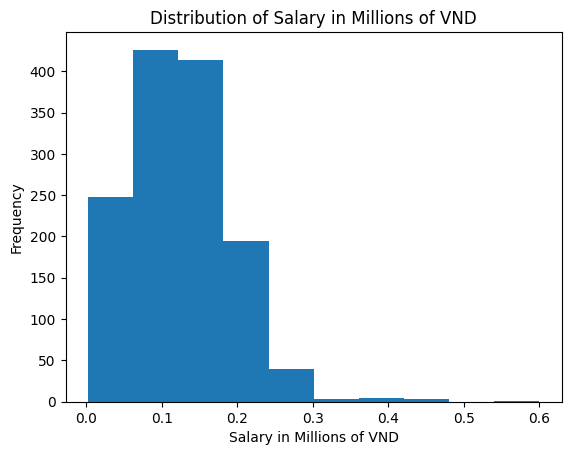

In [ ]:
##Bài 2

df['salary_in_vnd'] = df['salary_in_usd'] / 1000000

plt.hist(df['salary_in_vnd'], bins=10)
plt.xlabel('Salary in Millions of VND')
plt.ylabel('Frequency')
plt.title('Distribution of Salary in Millions of VND')
plt.show()


Giới tính có tỉ lệ xuất hiện nhiều hơn:  Female


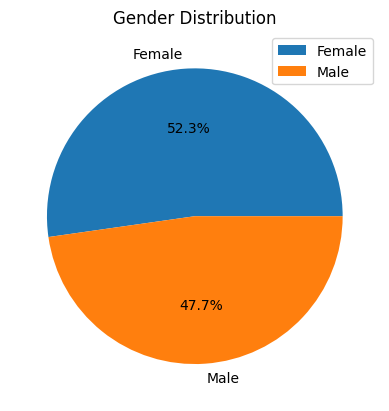

In [ ]:
##Bài 4

#Thêm cột gender với 2 giá trị random 0 hoặc 1
df['gender'] = np.random.choice([0, 1], size=len(df))

#Tính số lần mỗi giá trị cột gender xuất hiện và phiên dịch giá trị của cột gender
gender_counts = df['gender'].value_counts()
gender_dict = {0: 'Male', 1: 'Female'}
labels = [gender_dict[i] for i in gender_counts.index]

#Xét giới tính có tỉ lệ nhiều hơn
higher_proportion_gender = 'Female' if gender_counts[1] > gender_counts[0] else 'Male'
print("Giới tính có tỉ lệ xuất hiện nhiều hơn: ", higher_proportion_gender)

# Plot pie chart
plt.pie(gender_counts, labels = labels, autopct='%1.1f%%')
plt.legend()
plt.title('Gender Distribution')
plt.show()

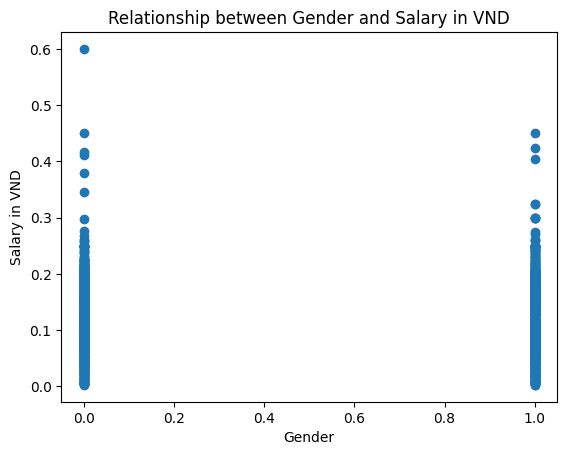

Qua sơ đồ phân tán trên, ta nhận thấy mối quan hệ giữa 2 đại lượng này là mối quan hệ tuyến tính.


In [ ]:
##Bài 6
plt.scatter(df['gender'], df['salary_in_vnd'])
plt.xlabel('Gender')
plt.ylabel('Salary in VND')
plt.title('Relationship between Gender and Salary in VND')
plt.show()
print("Qua sơ đồ phân tán trên, ta nhận thấy mối quan hệ giữa 2 đại lượng này là mối quan hệ tuyến tính.")

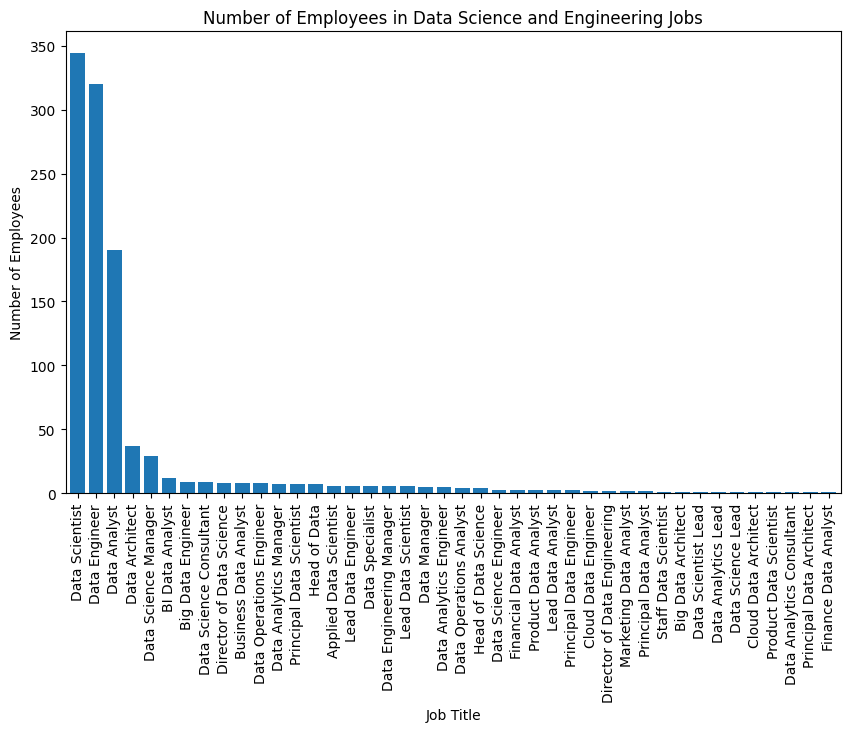

In [ ]:
##Bài 10
plt.figure(figsize=(10, 6))
data_jobs = df[df['job_title'].str.contains('Data', case=False)]
data_jobs['job_title'].value_counts().plot(kind='bar', width=0.8)
plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in Data Science and Engineering Jobs')
plt.show()

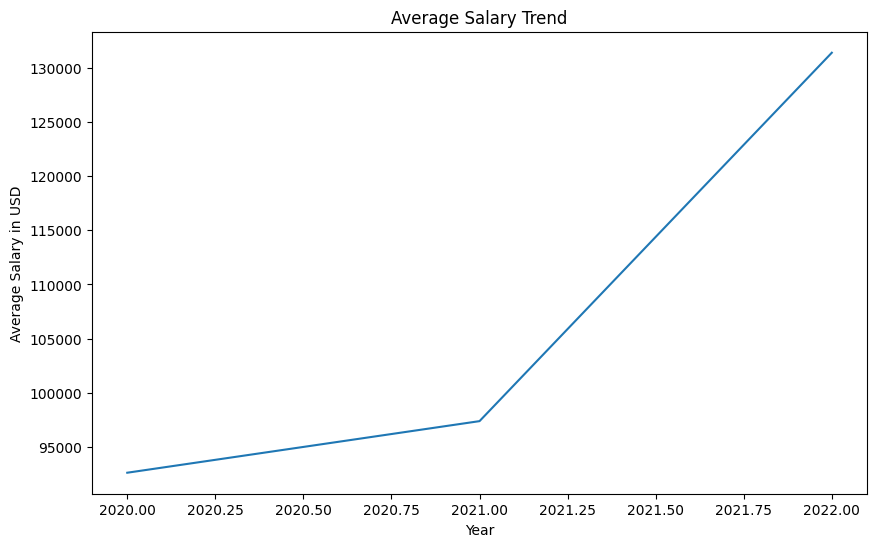

In [ ]:
##Bai 11
average_salary = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))

plt.plot(average_salary.index, average_salary.values)
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary Trend')
plt.show()

In [ ]:
##Bai 13
average_salary_500 = df['salary_in_usd'].head(500).mean()

low_salary_count = df[df['salary_in_usd'] < average_salary_500].shape[0]
high_salary_count = df[df['salary_in_usd'] >= average_salary_500].shape[0]

print("Average Salary of the first 500 people:", average_salary_500)
print("Number of employees with Low Salary:", low_salary_count)
print("Number of employees with High Salary:", high_salary_count)

Average Salary of the first 500 people: 134229.31
Number of employees with Low Salary: 765
Number of employees with High Salary: 567


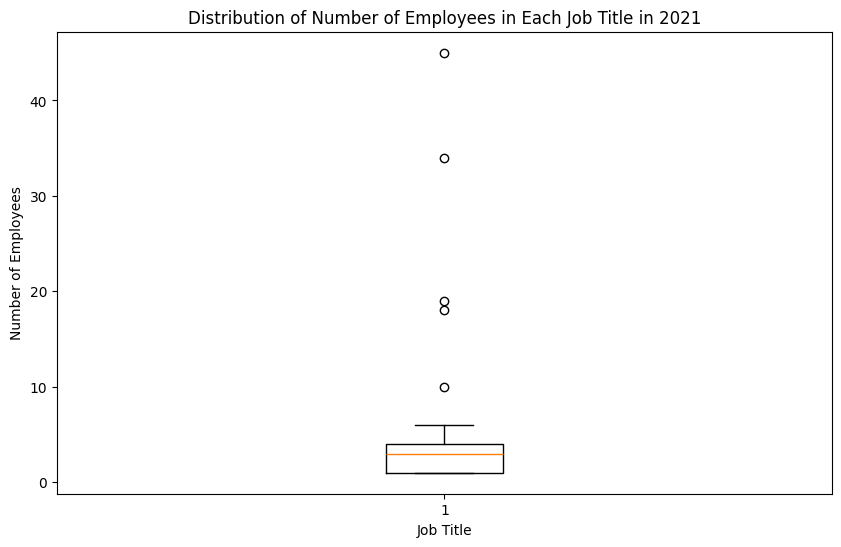

In [ ]:
##Bai 16
data_2021 = df[df['work_year'] == 2021]

plt.figure(figsize=(10, 6))
plt.boxplot(data_2021['job_title'].value_counts())
plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
plt.title('Distribution of Number of Employees in Each Job Title in 2021')
plt.show()


Nhận xét: sự phân bố các ngành nghề vào năm 2021 có khác nhau về số lượng

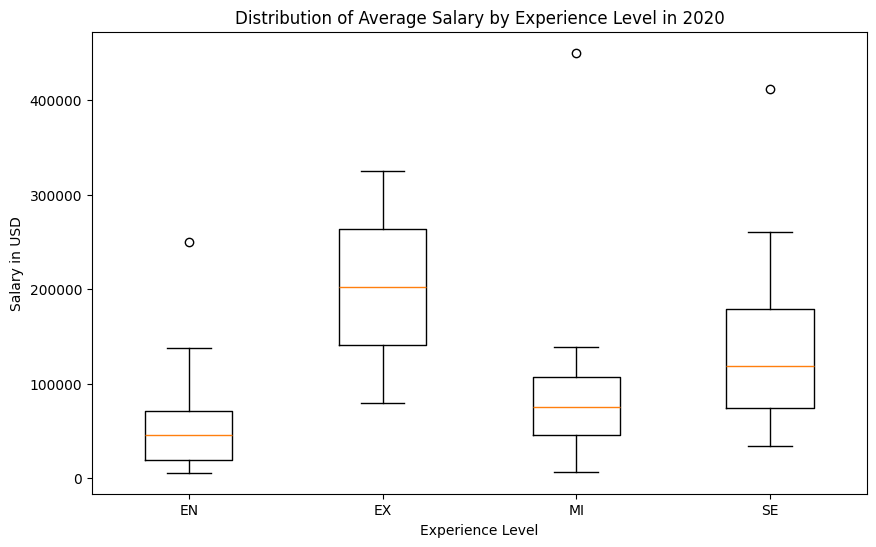

In [ ]:
##Bai 17

data_2020 = df[df['work_year'] == 2020]

average_salary_2020 = data_2020.groupby('experience_level')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
plt.boxplot(data_2020.groupby('experience_level')['salary_in_usd'].apply(list))
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Distribution of Average Salary by Experience Level in 2020')
plt.xticks(range(1, len(average_salary_2020) + 1), average_salary_2020.index)
plt.show()

Nhận xét: Có sự chênh lệch về mức lương đáng kể giữa các cấp độ kinh nghiệm

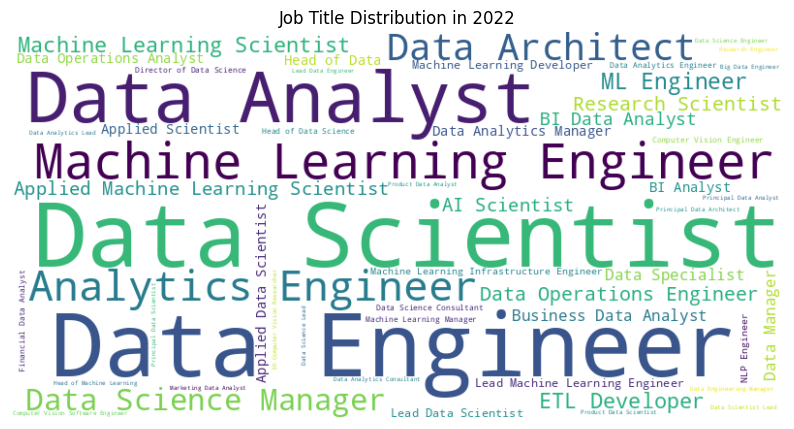

In [ ]:
##Bai 25
data_2022 = df[df['work_year'] == 2022]
job_title_counts = data_2022['job_title'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(job_title_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Title Distribution in 2022')
plt.show()

Nhận xét: Các ngành liên quan đến data có số lượng nhân sự lớn, mặc dù có đa dạng các ngành liên quan đến Machine Learning nhưng số lượng nhân sự chỉ ở mức trung bình